In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline
import warnings

warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
data, sampling_rate = librosa.load('D:/Machine Learning/Urban_sound_dataset/New/train/Train/0.wav')

In [3]:
sampling_rate

22050

In [4]:
df_train = pd.read_csv('D:/Machine Learning/Urban_sound_dataset/New/train/train.csv')

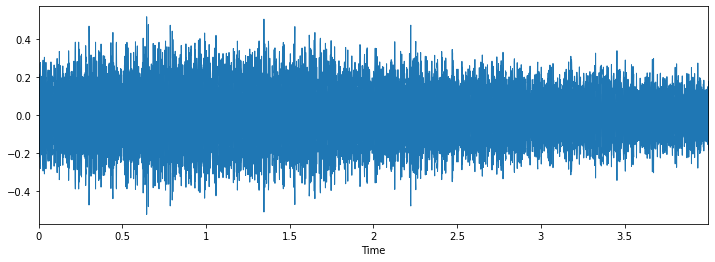

In [5]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

In [6]:
index = random.choice(df_train.index)

Class: dog_bark


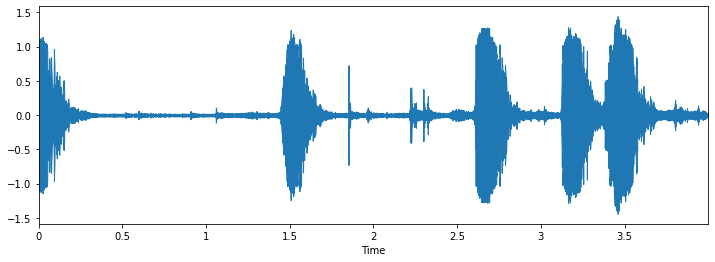

In [7]:
print('Class:', df_train['Class'][index])
data, sampling_rate = librosa.load('D:/Machine Learning/Urban_sound_dataset/New/train/Train/'+str(df_train['ID'][index])+'.wav')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

<AxesSubplot:xlabel='Class', ylabel='count'>

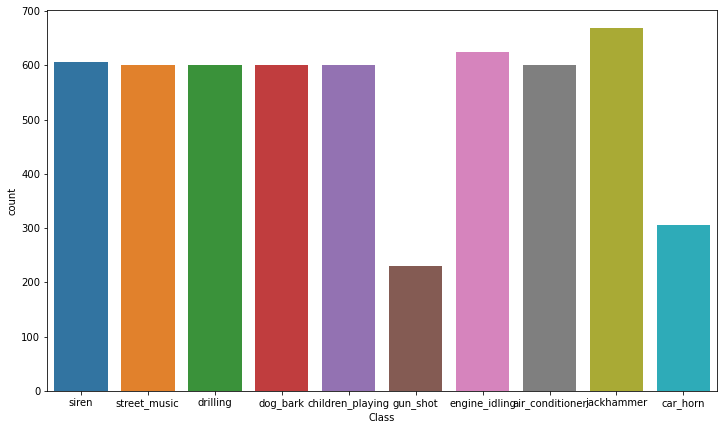

In [8]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(df_train['Class'])

In [9]:
import os
def parser(row):
    #path of the file
    file_name = os.path.join('D:/Machine Learning/Urban_sound_dataset/New/train/Train/'+str(row.ID)+ '.wav')
    #load the audio file
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    #extract features from the data
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    
    feature = mfccs
    label = row.Class
    
    return [feature, label]

In [10]:
data = df_train.apply(parser, axis=1)
data.columns = ['feature','label']

In [11]:
data.head()

0    [[-82.12359, 139.50592, -42.430866, 24.82786, ...
1    [[-15.744005, 124.119965, -29.42888, 39.447193...
2    [[-123.393654, 15.181949, -50.09333, 7.1418724...
3    [[-213.27881, 89.323586, -55.256187, 12.632097...
4    [[-237.92648, 135.90245, 39.26844, 21.240236, ...
dtype: object

In [12]:
#input split
X = np.array(list(zip(*data))[0])
y = np.array(list(zip(*data))[1])

In [13]:
###Label Encoder

In [14]:
import keras
print(keras.__version__)

2.5.0


In [15]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y = np_utils.to_categorical(le.fit_transform(y))

In [16]:
y.shape

(5435, 10)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU

num_classes = 10

#model creation
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(512, input_shape=(40,)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(256, input_shape=(40,)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
#train the model
model.fit(X,y,batch_size=32, epochs=500, validation_split=0.20)

Epoch 1/500
136/136 [==============================] - 13s 8ms/step - loss: 10.5662 - accuracy: 0.1857 - val_loss: 1.7683 - val_accuracy: 0.4250
Epoch 2/500
136/136 [==============================] - 1s 4ms/step - loss: 2.1184 - accuracy: 0.3371 - val_loss: 1.5814 - val_accuracy: 0.4977
Epoch 3/500
136/136 [==============================] - 1s 4ms/step - loss: 1.7480 - accuracy: 0.3913 - val_loss: 1.4221 - val_accuracy: 0.5511
Epoch 4/500
136/136 [==============================] - 1s 4ms/step - loss: 1.5869 - accuracy: 0.4690 - val_loss: 1.2614 - val_accuracy: 0.5814
Epoch 5/500
136/136 [==============================] - 1s 4ms/step - loss: 1.3381 - accuracy: 0.5473 - val_loss: 1.1525 - val_accuracy: 0.6578
Epoch 6/500
136/136 [==============================] - 1s 4ms/step - loss: 1.2004 - accuracy: 0.5921 - val_loss: 1.0482 - val_accuracy: 0.6762
Epoch 7/500
136/136 [==============================] - 1s 4ms/step - loss: 1.1070 - accuracy: 0.6236 - val_loss: 0.9824 - val_accuracy: 0.67

Epoch 58/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2858 - accuracy: 0.9144 - val_loss: 0.3943 - val_accuracy: 0.8896
Epoch 59/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2767 - accuracy: 0.9075 - val_loss: 0.4288 - val_accuracy: 0.8776
Epoch 60/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2867 - accuracy: 0.9121 - val_loss: 0.3678 - val_accuracy: 0.9043
Epoch 61/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2532 - accuracy: 0.9204 - val_loss: 0.4294 - val_accuracy: 0.8859
Epoch 62/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2720 - accuracy: 0.9044 - val_loss: 0.4078 - val_accuracy: 0.9052
Epoch 63/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2894 - accuracy: 0.9012 - val_loss: 0.4106 - val_accuracy: 0.9052
Epoch 64/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2826 - accuracy: 0.9061 - val_loss: 0.3945 - val_accuracy:

Epoch 115/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2344 - accuracy: 0.9304 - val_loss: 0.5159 - val_accuracy: 0.8924
Epoch 116/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2510 - accuracy: 0.9317 - val_loss: 0.5018 - val_accuracy: 0.9163
Epoch 117/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2008 - accuracy: 0.9340 - val_loss: 0.4749 - val_accuracy: 0.9154
Epoch 118/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2466 - accuracy: 0.9338 - val_loss: 0.4608 - val_accuracy: 0.9172
Epoch 119/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2261 - accuracy: 0.9369 - val_loss: 0.5682 - val_accuracy: 0.9108
Epoch 120/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2932 - accuracy: 0.9334 - val_loss: 0.4617 - val_accuracy: 0.9071
Epoch 121/500
136/136 [==============================] - 1s 4ms/step - loss: 0.1941 - accuracy: 0.9392 - val_loss: 0.4943 - val_ac

136/136 [==============================] - 1s 4ms/step - loss: 0.2813 - accuracy: 0.9359 - val_loss: 0.4880 - val_accuracy: 0.9163
Epoch 172/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2178 - accuracy: 0.9371 - val_loss: 0.4863 - val_accuracy: 0.9190
Epoch 173/500
136/136 [==============================] - 1s 4ms/step - loss: 0.1617 - accuracy: 0.9519 - val_loss: 0.4430 - val_accuracy: 0.9319
Epoch 174/500
136/136 [==============================] - 1s 4ms/step - loss: 0.1467 - accuracy: 0.9587 - val_loss: 0.5410 - val_accuracy: 0.9200
Epoch 175/500
136/136 [==============================] - 1s 4ms/step - loss: 0.1888 - accuracy: 0.9516 - val_loss: 0.5481 - val_accuracy: 0.9218
Epoch 176/500
136/136 [==============================] - 1s 4ms/step - loss: 0.1600 - accuracy: 0.9562 - val_loss: 0.5814 - val_accuracy: 0.9108
Epoch 177/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2308 - accuracy: 0.9346 - val_loss: 0.6154 - val_accuracy: 0.9080

136/136 [==============================] - 1s 4ms/step - loss: 0.3162 - accuracy: 0.9352 - val_loss: 0.6117 - val_accuracy: 0.9236
Epoch 228/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2090 - accuracy: 0.9442 - val_loss: 0.6448 - val_accuracy: 0.9172
Epoch 229/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2193 - accuracy: 0.9410 - val_loss: 0.6023 - val_accuracy: 0.9172
Epoch 230/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2364 - accuracy: 0.9366 - val_loss: 0.6942 - val_accuracy: 0.9209
Epoch 231/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2139 - accuracy: 0.9515 - val_loss: 0.6073 - val_accuracy: 0.9181
Epoch 232/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2463 - accuracy: 0.9374 - val_loss: 0.5229 - val_accuracy: 0.9347
Epoch 233/500
136/136 [==============================] - 1s 4ms/step - loss: 0.1930 - accuracy: 0.9486 - val_loss: 0.5852 - val_accuracy: 0.9227

136/136 [==============================] - 1s 4ms/step - loss: 0.2351 - accuracy: 0.9482 - val_loss: 0.7027 - val_accuracy: 0.9273
Epoch 284/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2942 - accuracy: 0.9329 - val_loss: 0.7053 - val_accuracy: 0.9144
Epoch 285/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2362 - accuracy: 0.9444 - val_loss: 0.6635 - val_accuracy: 0.9246
Epoch 286/500
136/136 [==============================] - 1s 4ms/step - loss: 0.1782 - accuracy: 0.9557 - val_loss: 0.6525 - val_accuracy: 0.9264
Epoch 287/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2434 - accuracy: 0.9398 - val_loss: 0.6246 - val_accuracy: 0.9264
Epoch 288/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2078 - accuracy: 0.9542 - val_loss: 0.7962 - val_accuracy: 0.9144
Epoch 289/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2418 - accuracy: 0.9467 - val_loss: 0.6621 - val_accuracy: 0.9301

136/136 [==============================] - 1s 4ms/step - loss: 0.2380 - accuracy: 0.9497 - val_loss: 0.8838 - val_accuracy: 0.9282
Epoch 340/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2480 - accuracy: 0.9446 - val_loss: 0.9648 - val_accuracy: 0.9181
Epoch 341/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2449 - accuracy: 0.9485 - val_loss: 0.9882 - val_accuracy: 0.9227
Epoch 342/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.9475 - val_loss: 0.9798 - val_accuracy: 0.9190
Epoch 343/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2055 - accuracy: 0.9523 - val_loss: 0.7782 - val_accuracy: 0.9218
Epoch 344/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2967 - accuracy: 0.9434 - val_loss: 0.9166 - val_accuracy: 0.9135
Epoch 345/500
136/136 [==============================] - 1s 4ms/step - loss: 0.2329 - accuracy: 0.9433 - val_loss: 1.0318 - val_accuracy: 0.9264